In [60]:
import numpy as np
from astropy.io import fits
from astropy import units as u
from astropy import coordinates as coord
from astropy.coordinates import ICRS, Galactic, FK4, FK5
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from astropy.wcs import WCS
from astropy.visualization.wcsaxes import WCSAxes
from matplotlib.patches import Rectangle
from scipy.stats import pearsonr, spearmanr
from BootstrapCorrelation import korr, korr2
from astropy.io import ascii

In [4]:
filename1 = '../DS9/suzaku_rebin.fits'
hdu1 = fits.open(filename1)
suzaku_data = hdu1[0].data

filename2 = '../DS9/rxj1713_Np_mopra_13pixels.fits'
hdu2 = fits.open(filename2)
Np_mop_data =hdu2[0].data

In [165]:
suzaku_data.shape
Np_mop_data.shape

(133, 133)

In [51]:
reg3 = coord.SkyCoord(ra=258.4457*u.deg, dec=-39.2666*u.deg, frame='fk5')
reg3
reg3.dec.hms
reg3.ra.hms

<SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    (258.4457, -39.2666)>

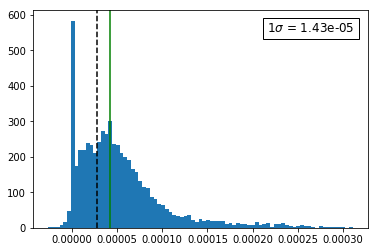

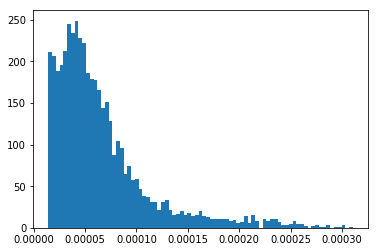

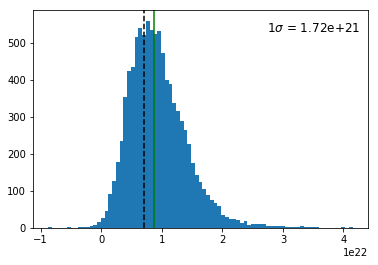

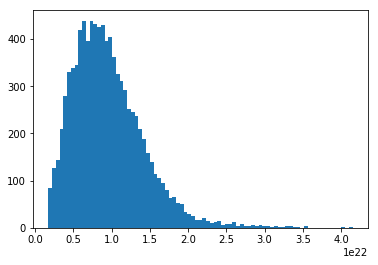

In [7]:

suzaku_data2 = suzaku_data[~np.isnan(suzaku_data)]
Np_mop_data2 = Np_mop_data[~np.isnan(Np_mop_data)]

# suzaku_data2 = [i for i in suzaku_data2 if i >= 4.e-6]
# suzaku_data2 = [i for i in suzaku_data2 if i <= 2.e-4]


sigma_s = np.percentile(suzaku_data2,50) - np.percentile(suzaku_data2,68.26/2)
sigma_N = np.percentile(Np_mop_data2,50) - np.percentile(Np_mop_data2,68.26/2)

suzaku_data3 = [i for i in suzaku_data2 if i >= sigma_s]
Np_mop_data3 = [i for i in Np_mop_data2 if i >= sigma_N]


#use range option in plt.hist when you have nan in your data
fig = plt.figure()
ax = fig.add_subplot(111)
plt.hist(suzaku_data2, bins=81)
plt.axvline(np.percentile(suzaku_data2,50), color = 'g', ls = "-")
plt.axvline(np.percentile(suzaku_data2,68.26/2.0), color = 'k', ls = "--")
plt.text(0.7, 0.9, '1$\sigma$ = {:1.2e}'.format(sigma_s), size=12, transform=ax.transAxes, bbox=dict(facecolor='white'))
plt.show()
plt.hist(suzaku_data3, bins=81)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.hist(Np_mop_data2, bins=81)
plt.axvline(np.percentile(Np_mop_data2,50), color = 'g', ls = "-")
plt.axvline(np.percentile(Np_mop_data2,68.26/2.0), color = 'k', ls = "--")
plt.text(0.7, 0.9, '1$\sigma$ = {:1.2e}'.format(sigma_N), size=12, transform=ax.transAxes)
plt.show()
plt.hist(Np_mop_data3, bins=81) 
plt.show()

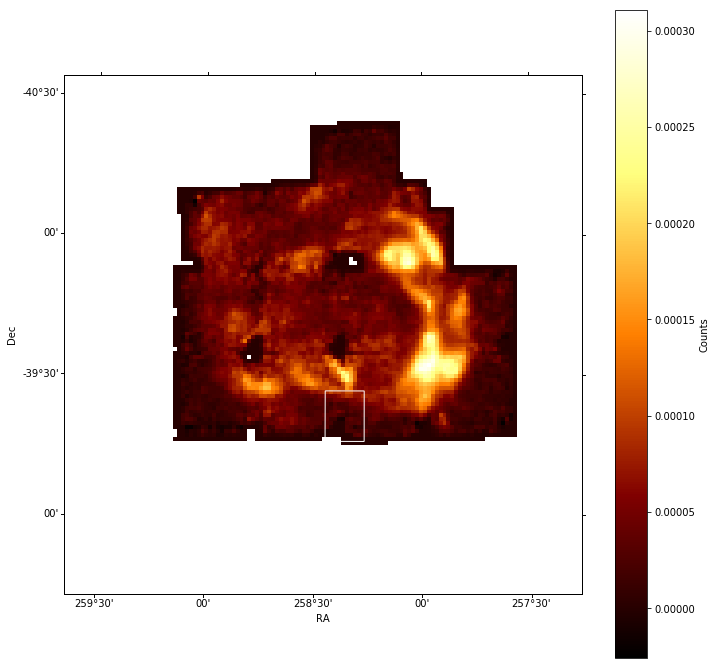

In [99]:
fig = plt.figure(figsize=(9,9))

wcs = WCS(suzaku_header)
ax = WCSAxes(fig, [0,0,1,1], wcs=wcs)
fig.add_axes(ax)

plt.imshow(suzaku_data, cmap=cm.afmhot) #vlim is limiting the colourbar range

cb = plt.colorbar()
cb.set_label('Counts')

# ax.scatter(258.4457, -39.2666, transform=ax.get_transform('fk5'), s=300, edgecolor='white', facecolor='none')
r = Rectangle((258.4457, -39.2666), -0.18, -0.18, edgecolor='white', facecolor='none', transform=ax.get_transform('fk5'))
ax.add_patch(r)

plt.xlabel('RA')
plt.ylabel('Dec')

#plt.tight_layout()
# plt.savefig('test.eps', bbox_inches='tight')

In [9]:
# order the fits data for each region according to ascending region number
s_data = []
Np_data = []

s_data.append(suzaku_data[81:94,41:54].flatten())
s_data.append(suzaku_data[81:94,54:67].flatten())
s_data.append(suzaku_data[81:94,67:80].flatten())
s_data.append(suzaku_data[81:94,80:93].flatten())

s_data.append(suzaku_data[68:81,28:41].flatten())
s_data.append(suzaku_data[68:81,41:54].flatten())
s_data.append(suzaku_data[68:81,54:67].flatten())
s_data.append(suzaku_data[68:81,67:80].flatten())
s_data.append(suzaku_data[68:81,80:93].flatten())
s_data.append(suzaku_data[68:81,93:106].flatten())

s_data.append(suzaku_data[55:68,28:41].flatten())
s_data.append(suzaku_data[55:68,41:54].flatten())
s_data.append(suzaku_data[55:68,54:67].flatten())
s_data.append(suzaku_data[55:68,67:80].flatten())
s_data.append(suzaku_data[55:68,80:93].flatten())
s_data.append(suzaku_data[55:68,93:106].flatten())

s_data.append(suzaku_data[42:55,28:41].flatten())
s_data.append(suzaku_data[42:55,41:54].flatten())
s_data.append(suzaku_data[42:55,54:67].flatten())
s_data.append(suzaku_data[42:55,67:80].flatten())
s_data.append(suzaku_data[42:55,80:93].flatten())
s_data.append(suzaku_data[42:55,93:106].flatten())

s_data.append(suzaku_data[29:42,28:41].flatten())
s_data.append(suzaku_data[29:42,41:54].flatten())
s_data.append(suzaku_data[29:42,54:67].flatten())
s_data.append(suzaku_data[29:42,67:80].flatten())
s_data.append(suzaku_data[29:42,80:93].flatten())

s_data.append(suzaku_data[16:29,54:67].flatten())
s_data.append(suzaku_data[16:29,67:80].flatten())

Np_data.append(Np_mop_data[81:94,41:54].flatten())
Np_data.append(Np_mop_data[81:94,54:67].flatten())
Np_data.append(Np_mop_data[81:94,67:80].flatten())
Np_data.append(Np_mop_data[81:94,80:93].flatten())

Np_data.append(Np_mop_data[68:81,28:41].flatten())
Np_data.append(Np_mop_data[68:81,41:54].flatten())
Np_data.append(Np_mop_data[68:81,54:67].flatten())
Np_data.append(Np_mop_data[68:81,67:80].flatten())
Np_data.append(Np_mop_data[68:81,80:93].flatten())
Np_data.append(Np_mop_data[68:81,93:106].flatten())

Np_data.append(Np_mop_data[55:68,28:41].flatten())
Np_data.append(Np_mop_data[55:68,41:54].flatten())
Np_data.append(Np_mop_data[55:68,54:67].flatten())
Np_data.append(Np_mop_data[55:68,67:80].flatten())
Np_data.append(Np_mop_data[55:68,80:93].flatten())
Np_data.append(Np_mop_data[55:68,93:106].flatten())

Np_data.append(Np_mop_data[42:55,28:41].flatten())
Np_data.append(Np_mop_data[42:55,41:54].flatten())
Np_data.append(Np_mop_data[42:55,54:67].flatten())
Np_data.append(Np_mop_data[42:55,67:80].flatten())
Np_data.append(Np_mop_data[42:55,80:93].flatten())
Np_data.append(Np_mop_data[42:55,93:106].flatten())

Np_data.append(Np_mop_data[29:42,28:41].flatten())
Np_data.append(Np_mop_data[29:42,41:54].flatten())
Np_data.append(Np_mop_data[29:42,54:67].flatten())
Np_data.append(Np_mop_data[29:42,67:80].flatten())
Np_data.append(Np_mop_data[29:42,80:93].flatten())

Np_data.append(Np_mop_data[16:29,54:67].flatten())
Np_data.append(Np_mop_data[16:29,67:80].flatten())

#remove x-ray points with nan or noisey and corresponding Np data points
n = len(s_data[0])
for i in range(29):
    k = 0
    for j in range(n):
        if np.isfinite(s_data[i][k]) == False or s_data[i][k] < sigma_s:
            s_data[i] = np.delete(s_data[i], k, axis=0)
            Np_data[i] = np.delete(Np_data[i], k, axis=0)
            k = k - 1
        k = k + 1


In [74]:
#calculate the error for the individual suzaku data and the gas data
# Trms might need updating for mopra
s_error = []
Np_error = []
for i in range(29):
    s_error.append([])
    Np_error.append([])
    for j in range(len(Np_data[i])):
        s_error[i].append(s_data[i][j]/np.sqrt(8.79))
        Np_error[i].append(2. * 2.e20 * 1/np.sqrt(2.76) * 1.5 * np.sqrt(20.0/0.11) + 1.6 * np.sqrt(20.0/0.82) * 1.828e18 * 1/np.sqrt(2.76))
  



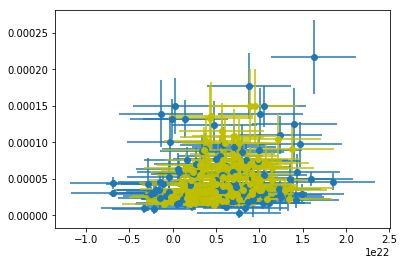

(0.12783822937065933, 0.1873390946268984)


0.12783822937065933

In [75]:
x = Np_data
x_error = Np_error
y = s_data
y_error = s_error
korr(x[0],y[0],x_error[0],y_error[0], plot = True)

In [76]:
# The korr function randomly redistributes each data point assuming the data point is normally distributed
# with its actual value as the mean ands its error as the std
# The korr2 function finds the pvalue distribution of a data-set
# This takes a long time to run, make j smaller to make sure it works first

k = []
kk = []
for i in range(len(x)):
    print(i)
    k.append([])
    kk.append([])
    for j in range(10000):
        k[i].append(korr(x[i],y[i],x_error[i],y_error[i]))
        kk[i].append(korr2(np.mean(x[i]/1.e21), np.std(x[i]/1.e21), np.mean(y[i]), np.std(y[i]), len(x[i])))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28


------------------
1
Actual value 0.30048135
Spearman value 0.39817275905760857
Extreme value (3 sigma uncertainty) -0.09797937536365832 0.38642355852572496
3 sigma 0.2872242264354375
5 sigma 0.3581722180537016


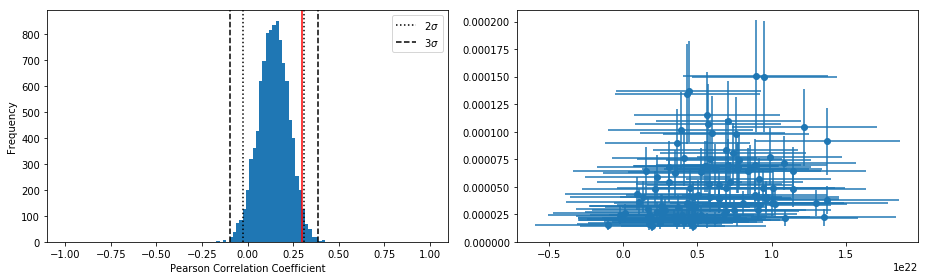

------------------
2
Actual value -0.25278276
Spearman value -0.29975423387997674
Extreme value (3 sigma uncertainty) -0.3244236870823286 0.1437426888609285
3 sigma 0.25862360562743075
5 sigma 0.32386649472428897


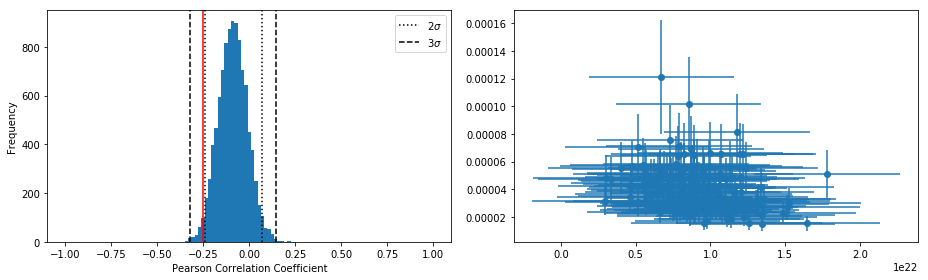

------------------
3
Actual value -0.18353954
Spearman value -0.19747140982377204
Extreme value (3 sigma uncertainty) -0.3143179674824677 0.15997737661971984
3 sigma 0.2587443904915059
5 sigma 0.40370153061352076


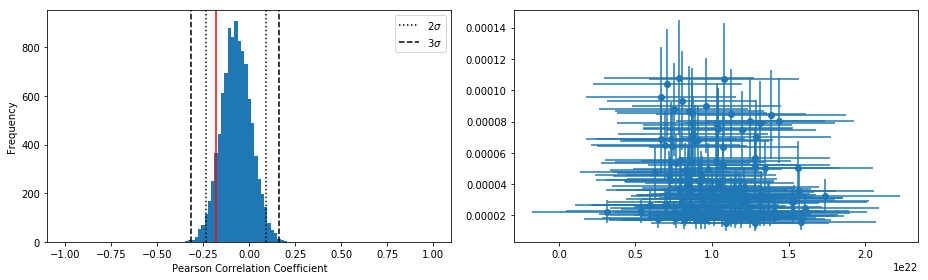

------------------
4
Actual value 0.13506567
Spearman value 0.14831646044244473
Extreme value (3 sigma uncertainty) -0.20115830988279287 0.28971840414846306
3 sigma 0.26947643984286557
5 sigma 0.3304502046270407


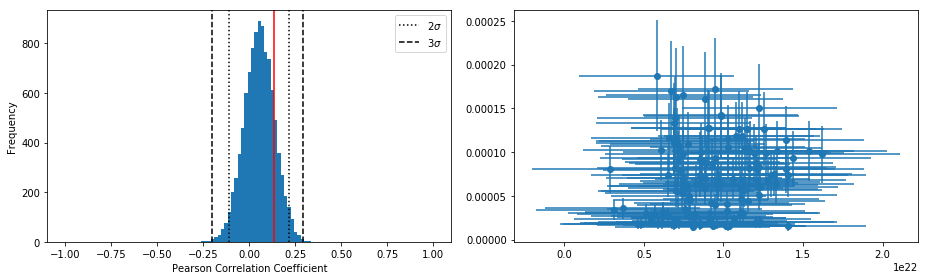

------------------
5
Actual value 0.28811598
Spearman value 0.3238508682328908
Extreme value (3 sigma uncertainty) -0.19974680507610015 0.38243399406654255
3 sigma 0.3177328043662473
5 sigma 0.39066667730272103


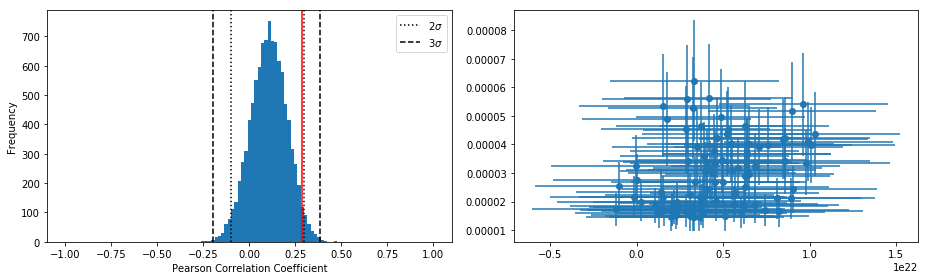

------------------
6
Actual value 0.21504141
Spearman value 0.20801323090055485
Extreme value (3 sigma uncertainty) -0.15920503211473302 0.31556561058294674
3 sigma 0.23581221793960488
5 sigma 0.3398720296622596


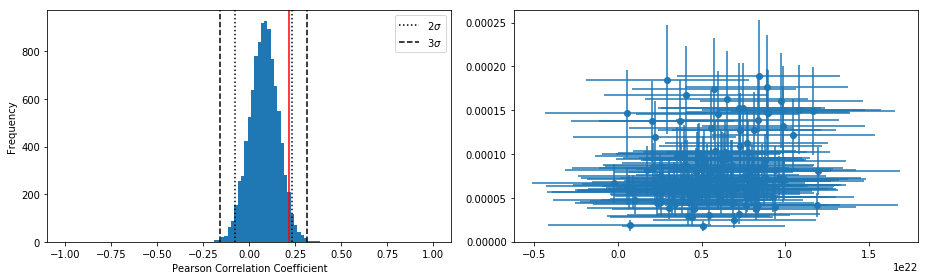

------------------
7
Actual value 0.2558319
Spearman value 0.243401621003431
Extreme value (3 sigma uncertainty) -0.14825695188865057 0.28796926150556695
3 sigma 0.23229363176096968
5 sigma 0.2751546211520356


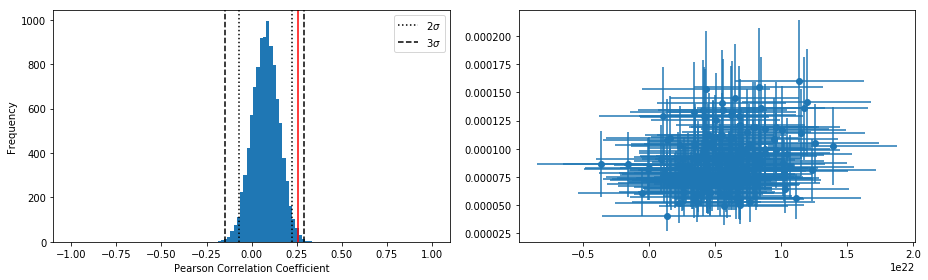

------------------
8
Actual value -0.16468841
Spearman value -0.1703590527119939
Extreme value (3 sigma uncertainty) -0.26563005785042515 0.18213682895242064
3 sigma 0.23264905568622948
5 sigma 0.321194053444049


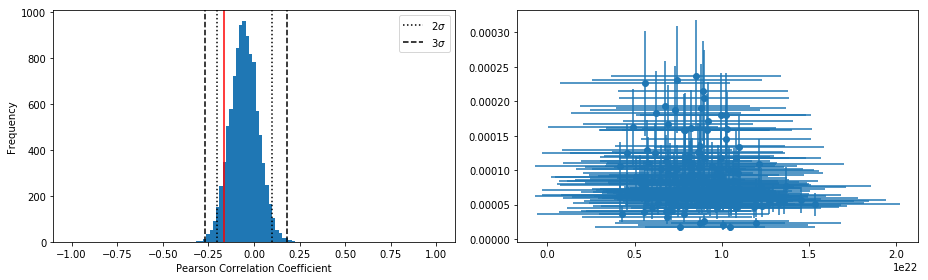

------------------
9
Actual value 0.14678569
Spearman value 0.20019640992491672
Extreme value (3 sigma uncertainty) -0.11155634687654892 0.267253121281112
3 sigma 0.2364714516998666
5 sigma 0.290448863225572


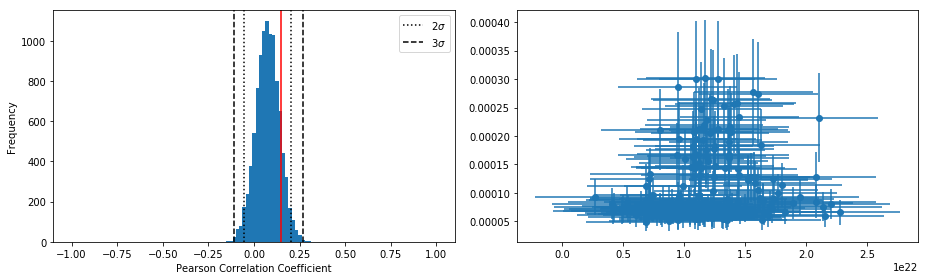

------------------
10
Actual value 0.33091608
Spearman value 0.3423454296226824
Extreme value (3 sigma uncertainty) -0.05852094543106079 0.33769355597589185
3 sigma 0.2287842186493388
5 sigma 0.2649232066023799


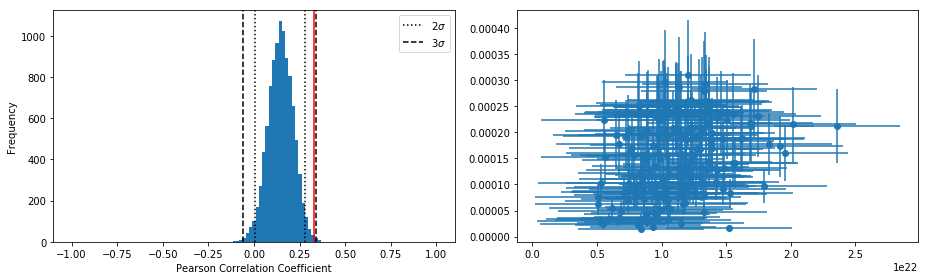

------------------
11
Actual value 0.21306731
Spearman value 0.24036370263866674
Extreme value (3 sigma uncertainty) -0.18331195224590408 0.3285313565301393
3 sigma 0.2796377190905875
5 sigma 0.3648627310309095


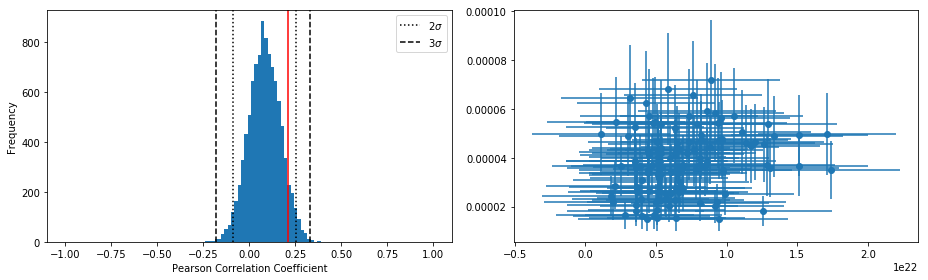

------------------
12
Actual value 0.21062644
Spearman value 0.16274017545901429
Extreme value (3 sigma uncertainty) -0.16218060669124207 0.279405494056053
3 sigma 0.22837164307013558
5 sigma 0.29933644903525597


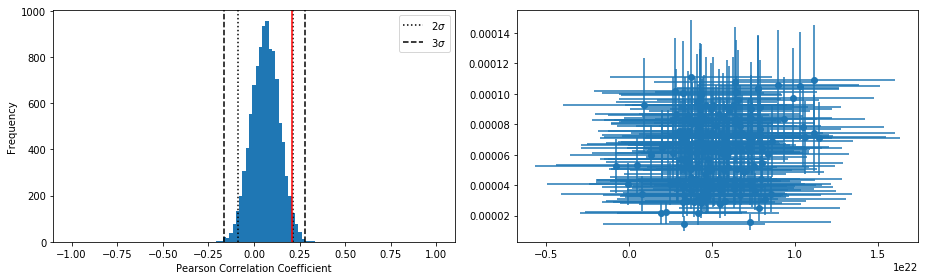

------------------
13
Actual value -0.17465016
Spearman value -0.21147392450939206
Extreme value (3 sigma uncertainty) -0.2528424034329662 0.19844492988342272
3 sigma 0.22378735876887243
5 sigma 0.30146669170160156


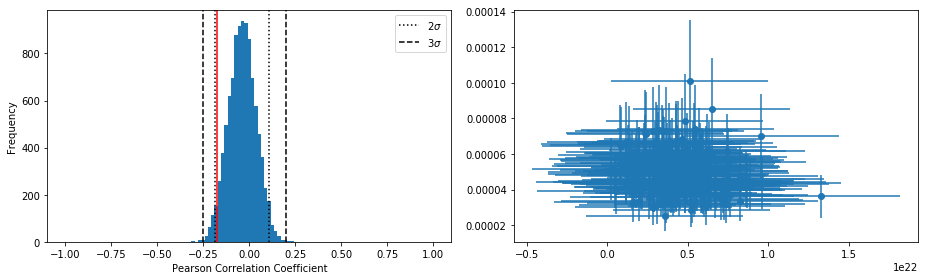

------------------
14
Actual value 0.037720878
Spearman value -0.006573053236353144
Extreme value (3 sigma uncertainty) -0.21497087511483343 0.2353193096764764
3 sigma 0.2364502074130069
5 sigma 0.32544370245358745


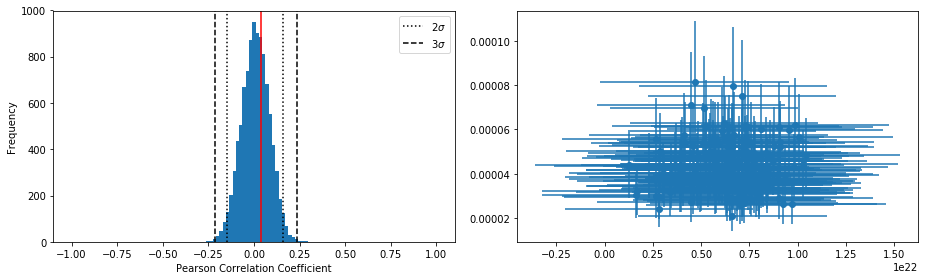

------------------
15
Actual value 0.11742849
Spearman value 0.038752424046541695
Extreme value (3 sigma uncertainty) -0.17678501891690993 0.24428778717097374
3 sigma 0.22557681353999678
5 sigma 0.3574768462806601


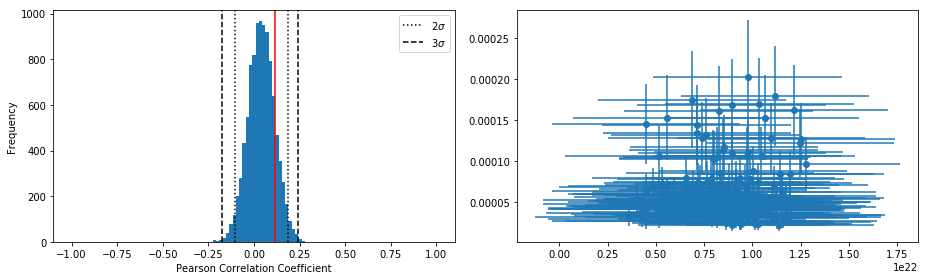

------------------
16
Actual value -0.046122495
Spearman value -0.009044801352493663
Extreme value (3 sigma uncertainty) -0.22147337042187049 0.18537647777850882
3 sigma 0.23234301949645583
5 sigma 0.28087794136619454


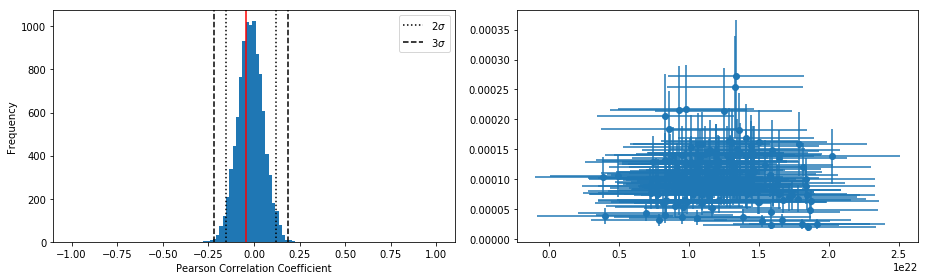

------------------
17
Actual value 0.07307883
Spearman value 0.06136214238760753
Extreme value (3 sigma uncertainty) -0.2504039831371081 0.291626506643898
3 sigma 0.2839525088316627
5 sigma 0.3716333531596435


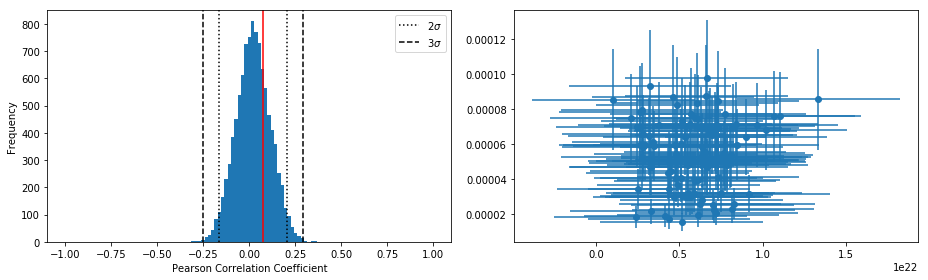

------------------
18
Actual value 0.12347227
Spearman value 0.13342402024131786
Extreme value (3 sigma uncertainty) -0.1920696689503143 0.2602950030366584
3 sigma 0.2353848685784184
5 sigma 0.2918229401105926


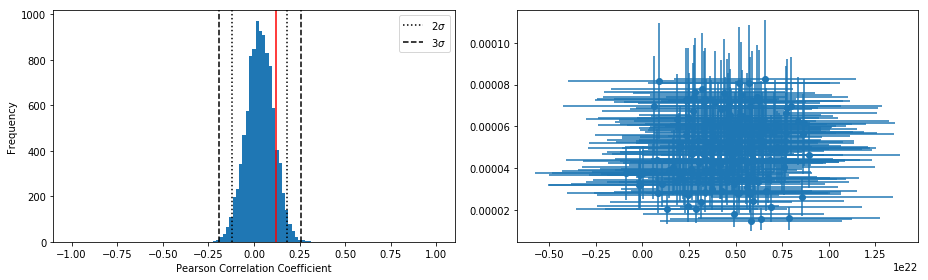

------------------
19
Actual value 0.020716948
Spearman value 0.02538456476733769
Extreme value (3 sigma uncertainty) -0.20879917620217328 0.21258867138201104
3 sigma 0.23430547685981704
5 sigma 0.2994456242838846


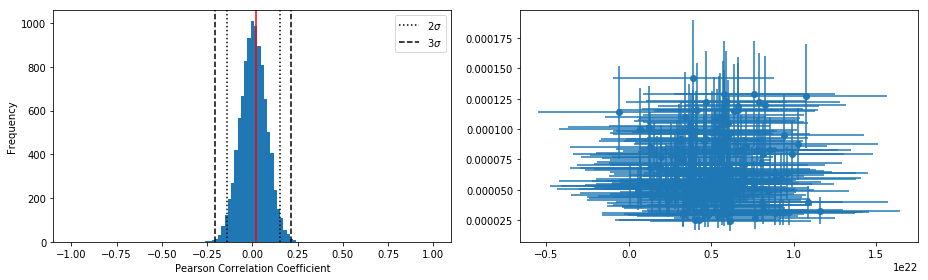

------------------
20
Actual value 0.07306411
Spearman value 0.11010542879622344
Extreme value (3 sigma uncertainty) -0.2275791114866269 0.27925665208897177
3 sigma 0.2657715954665242
5 sigma 0.4038956224544544


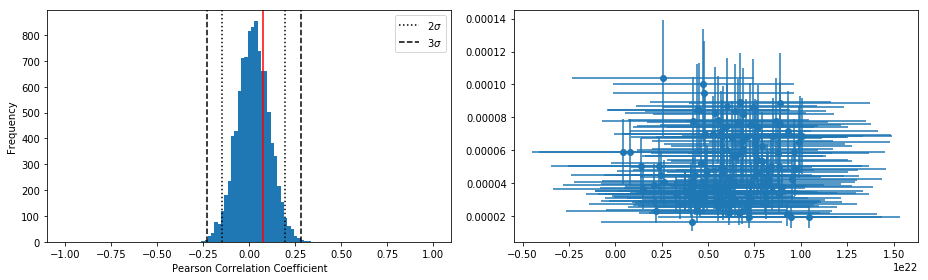

------------------
21
Actual value 0.68782604
Spearman value 0.7340510168564468
Extreme value (3 sigma uncertainty) 0.216060836251812 0.5600691573972356
3 sigma 0.2342972220987835
5 sigma 0.33294583432572333


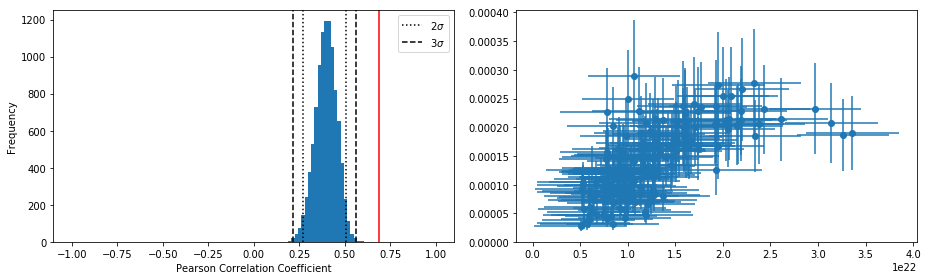

------------------
22
Actual value -0.12936282
Spearman value -0.16722189866045428
Extreme value (3 sigma uncertainty) -0.3154446654581091 0.20417445922254462
3 sigma 0.30160123336170175
5 sigma 0.3855167476087233


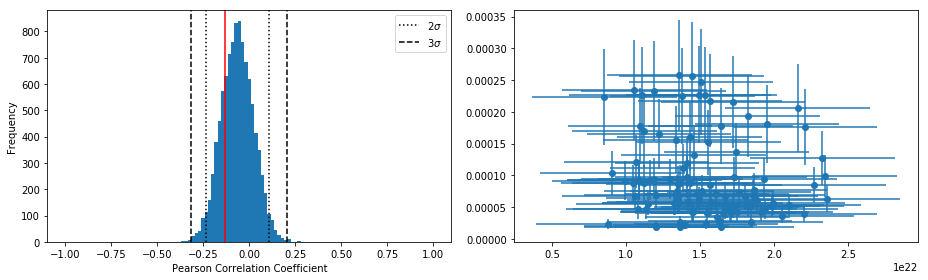

------------------
23
Actual value -0.19229801
Spearman value -0.19139227856090887
Extreme value (3 sigma uncertainty) -0.340689519669123 0.2329815217768394
3 sigma 0.30026722852068516
5 sigma 0.40617986302645437


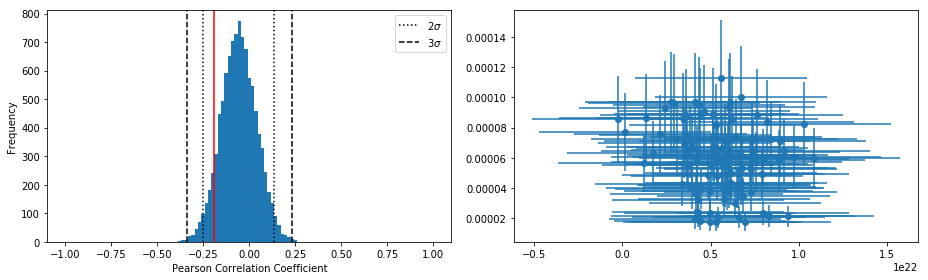

------------------
24
Actual value -0.21772295
Spearman value -0.21183534997576745
Extreme value (3 sigma uncertainty) -0.29760097178431655 0.16825091403780185
3 sigma 0.24454108055513207
5 sigma 0.3716085046100078


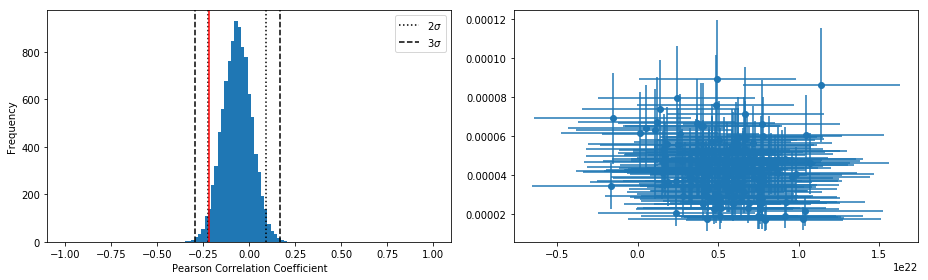

------------------
25
Actual value -0.079691015
Spearman value -0.057995624285217054
Extreme value (3 sigma uncertainty) -0.24554652894169232 0.19628810726251497
3 sigma 0.225799132579875
5 sigma 0.29400991625961226


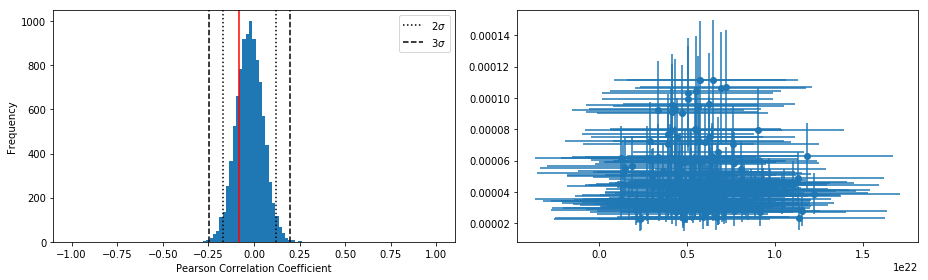

------------------
26
Actual value 0.13131012
Spearman value 0.1655810253095321
Extreme value (3 sigma uncertainty) -0.19975338627503014 0.24765093861943369
3 sigma 0.22755818791490215
5 sigma 0.29215418426929607


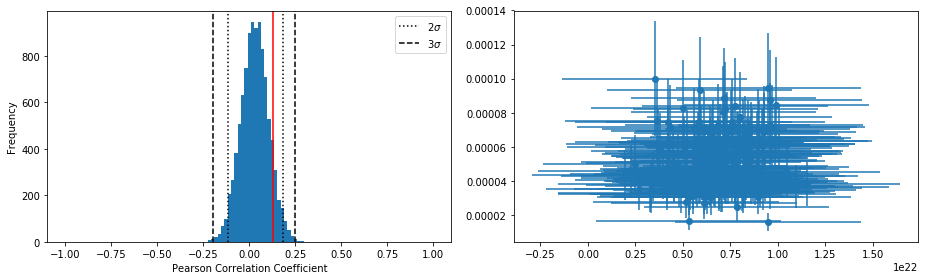

------------------
27
Actual value 0.5265351
Spearman value 0.4273656208045349
Extreme value (3 sigma uncertainty) 0.05370641569654924 0.4334894435873482
3 sigma 0.23188524513940031
5 sigma 0.2810250233483742


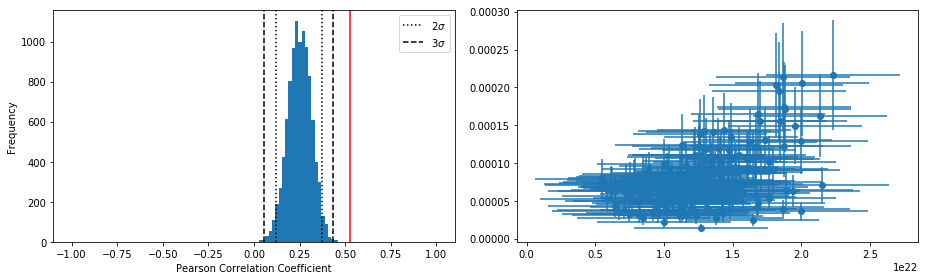

------------------
28
Actual value -0.0844916
Spearman value -0.15304347826086956
Extreme value (3 sigma uncertainty) -0.5835088289440303 0.5123061856718878
3 sigma 0.5766375705383757
5 sigma 0.7646861080231416


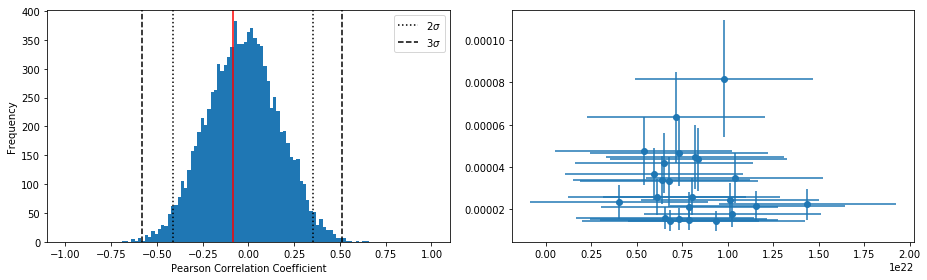

------------------
29
Actual value -0.3947819
Spearman value -0.42822870851659334
Extreme value (3 sigma uncertainty) -0.3788509378688655 0.11781042038952232
3 sigma 0.26975696661267995
5 sigma 0.33654132909927803


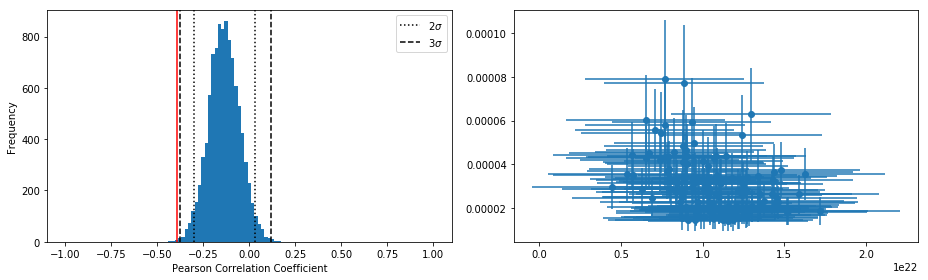

In [77]:
# Plot distribution of possible pearson values and display where 1sigma and 2sigma error is

for i in range(len(x)):
    
    print('------------------')
    print(i+1)
    print('Actual value', pearsonr(x[i]/1.e21,y[i])[0])
    print('Spearman value', spearmanr(x[i]/1.e21,y[i])[0])
    print('Extreme value (3 sigma uncertainty)', np.percentile(k[i], (100-99.73)/2.0), np.percentile(k[i], 100 - (100 - 99.73)/2.0))
    print('3 sigma', np.percentile(np.abs(kk[i]), 99.73))
    print('5 sigma', np.percentile(np.abs(kk[i]), 99.99994))
    
    f, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))
    ax1.hist(k[i], bins=111, range=[-1,1])
#     plt.axvline(np.percentile(k[i], (100-68.26)/2.0), color ='k', ls='--', label = '1$\sigma$')
#     plt.axvline(np.percentile(k[i], 100 - (100-68.26)/2.0), color ='k', ls='--')
    ax1.axvline(np.percentile(k[i], (100-95.45)/2.0), color ='k', ls=':', label = '2$\sigma$')
    ax1.axvline(np.percentile(k[i], 100 - (100-95.45)/2.0), color ='k', ls=':')
    ax1.axvline(np.percentile(k[i], (100-99.73)/2.0), color ='k', ls='--', label = '3$\sigma$')
    ax1.axvline(np.percentile(k[i], 100 - (100-99.73)/2.0), color ='k', ls='--')
    ax1.axvline(pearsonr(x[i]/1.e21,y[i])[0], color = 'red', ls = "-")
    ax1.legend(loc='best')
    ax1.set_xlabel("Pearson Correlation Coefficient")
    ax1.set_ylabel("Frequency")
    
    ax2.errorbar(x[i], y[i], xerr = x_error[i], yerr = y_error[i], fmt = "o")
    
    f.tight_layout()
    plt.show()
    
 

In [80]:
pearson_opt = []
opt_sig = []
sig = []
for i in range(29):
    if pearsonr(x[i]/1.e21,y[i])[0] > 0:
        pearson_opt.append(np.percentile(k[i], 100 - (100 - 99.73)/2.0))
    else:
        pearson_opt.append(np.percentile(k[i], (100 - 99.73)/2.0))
    
    if np.abs(pearson_opt[i]) > np.percentile(np.abs(kk[i]), 99.99994):
        opt_sig.append("5 sigma")
        sig.append("yes")
    elif np.abs(pearson_opt[i]) > np.percentile(np.abs(kk[i]), 99.73):
        opt_sig.append("3 sigma")
        sig.append(".")
    elif np.abs(pearson_opt[i]) > np.percentile(np.abs(kk[i]), 95.49):
        opt_sig.append("2 sigma")
        sig.append(".")
    elif np.abs(pearson_opt[i]) > np.percentile(np.abs(kk[i]), 68.26):
        opt_sig.append("1 sigma")
        sig.append(".")
    else:
        opt_sig.append("<1 sigma")
        sig.append(".")
    
   
    print(i+1, pearson_opt[i], opt_sig[i], sig[i])

1 0.38642355852572496 5 sigma yes
2 -0.3244236870823286 5 sigma yes
3 -0.3143179674824677 3 sigma .
4 0.28971840414846306 3 sigma .
5 0.38243399406654255 3 sigma .
6 0.31556561058294674 3 sigma .
7 0.28796926150556695 5 sigma yes
8 -0.26563005785042515 3 sigma .
9 0.267253121281112 3 sigma .
10 0.33769355597589185 5 sigma yes
11 0.3285313565301393 3 sigma .
12 0.279405494056053 3 sigma .
13 -0.2528424034329662 3 sigma .
14 0.2353193096764764 2 sigma .
15 0.24428778717097374 3 sigma .
16 -0.22147337042187049 2 sigma .
17 0.291626506643898 3 sigma .
18 0.2602950030366584 3 sigma .
19 0.21258867138201104 2 sigma .
20 0.27925665208897177 3 sigma .
21 0.5600691573972356 5 sigma yes
22 -0.3154446654581091 3 sigma .
23 -0.340689519669123 3 sigma .
24 -0.29760097178431655 3 sigma .
25 -0.24554652894169232 3 sigma .
26 0.24765093861943369 3 sigma .
27 0.4334894435873482 5 sigma yes
28 -0.5835088289440303 3 sigma .
29 -0.3788509378688655 5 sigma yes


In [81]:
hdu = fits.open('fitsfiles/rxj1713_pearson_suz_mHI.fits')
image_data = hdu[0].data
image_header = hdu[0].header

for i in range(image_data.shape[0]):
    for j in range(image_data.shape[1]):
        if image_data[i][j] == -10:
            image_data[i][j] = np.nan

reg = []
for i in range(29):
    reg.append(pearsonr(x[i]/1.e21,y[i])[0])
#     reg.append(pearson_opt[i])

In [82]:
image_data[6][2] = reg[0]
image_data[6][3] = reg[1]
image_data[6][4] = reg[2]
image_data[6][5] = reg[3]

image_data[5][1] = reg[4]
image_data[5][2] = reg[5]
image_data[5][3] = reg[6]
image_data[5][4] = reg[7]
image_data[5][5] = reg[8]
image_data[5][6] = reg[9]

image_data[4][1] = reg[10]
image_data[4][2] = reg[11]
image_data[4][3] = reg[12]
image_data[4][4] = reg[13]
image_data[4][5] = reg[14]
image_data[4][6] = reg[15]

image_data[3][1] = reg[16]
image_data[3][2] = reg[17]
image_data[3][3] = reg[18]
image_data[3][4] = reg[19]
image_data[3][5] = reg[20]
image_data[3][6] = reg[21]

image_data[2][1] = reg[22]
image_data[2][2] = reg[23]
image_data[2][3] = reg[24]
image_data[2][4] = reg[25]
image_data[2][5] = reg[26]

image_data[1][3] = reg[27]
image_data[1][4] = reg[28]

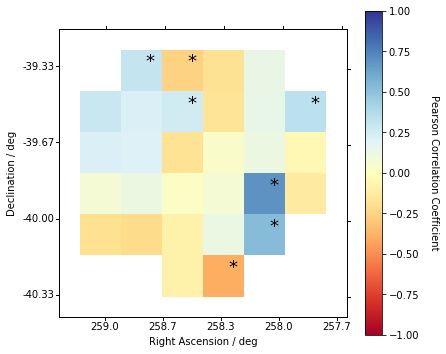

In [87]:
fig = plt.figure(figsize=(5,4.5))


wcs = WCS(image_header)
ax = WCSAxes(fig, [0,0,1,1], wcs= wcs)
fig.add_axes(ax)

ra = ax.coords['ra']
dec = ax.coords['dec']

#format axes
ra.set_major_formatter('d.d')
dec.set_major_formatter('d.dd')

plt.xlabel('Right Ascension / deg')
plt.ylabel('Declination / deg')

plt.imshow(image_data, cmap=plt.cm.RdYlBu, vmin =-1, vmax = 1, rasterized=True)
cbar = plt.colorbar()
cbar.set_label('Pearson Correlation Coefficient', rotation=270, labelpad=20)

plt.xlim(0,7)
plt.ylim(0,7) #flip y-axis

#Regions with an optimistic pearson value with significance > 5sigma 
plt.text(2.1,6.07,'*',fontsize=18)
plt.text(3.1,6.07,'*',fontsize=18)
plt.text(3.1,5.07,'*',fontsize=18)
plt.text(6.1,5.07,'*',fontsize=18)
plt.text(5.1,3.07,'*',fontsize=18)
plt.text(5.1,2.07,'*',fontsize=18)
plt.text(4.1,1.07,'*',fontsize=18)

plt.savefig('correlation_study_data/output/pearsonmap_suz_mopHI.ps', bbox_inches='tight', pad_inches=0.06)

plt.show()